In [144]:
# Ignore the code in this cell!!

import svgwrite
import collections

nobinding = "nobinding"

def binding(var):
    try:
        return eval(var)
    except NameError:
        return nobinding
    
class listis:
    def __init__(self):
        self.lis = []
    def get(self, key):
        for k,v in self.lis:
            if key is k:
                return v
    def put(self, key, val):
        new = True
        for pair in self.lis:
            if pair[0] is key:
                pair[1].append(val)
                new = False
        if new:
            self.lis.append([key, [val]])
    def keys(self):
        return [k for k,v in self.lis]

class memgraph:
    def __init__(self, vars):
        self.vars = sorted(vars)
        
    def _repr_svg_(self):
        d = svgwrite.Drawing(size=(800,200))

        left = 100
        right = 260
        dy = 30
        vv = listis()
        ais = listis()
        
        for var in self.vars:
            val = binding(var)
            if val != nobinding:
                vv.put(val,var)
                ais.put(val, val)

        vals = ais.keys()
        vary = dict()
        
        y = dy
        d.add(d.text("Variables", insert=(left, y), text_anchor="end", fill='blue'))
        y += dy
        
        for var in self.vars:
            d.add(d.text(var, insert=(left, y), text_anchor="end", fill='black'))
            vary[var] = y
            y += dy

        y = dy
        d.add(d.text("Objects(in the Heap)", insert=(right, y), fill='blue'))
        y += dy
        
        for val in vals:
            d.add(d.text(str(val), insert=(right, y), fill='black'))

            for var in vv.get(val):
                ly = vary[var]
                d.add(d.line((left, ly ), (right, y),  stroke=svgwrite.rgb(90, 10, 16, '%')))
            y += dy
            
        return d.tostring()

    def svg(self):
        return self._repr_svg_()



# Class
- classes define "templates or blueprints" for building objects
- once a class is defined, any number of objects can be "constructed", or "instantiated"
- everything in Python is an 'object'
    - not true in Java/C++
- all python objects 'live' in the 'heap'
- each object has a fixed 'type', which can be accessed via the 'type' function
- objects have attributes, which are "named objects"
- a 'method' is an attribute holding a function object, which can access and modify the object attributes
- class methods are invoked by functions, operators, and the "." syntax. examples below in 'List'

# Numbers
- int - arbitrary precision
- float - 64 bits
- complex


In [146]:
# numbers evaluate to themselves

1234 # anything after a '#" is a comment and ignored by Python

1234

In [147]:
# Python has the usual arithmetic operators

3*4 - 2**3

4

In [148]:
# a float "contaminates" an expression and 
# makes it a float

3*4 - 2**3.2

2.810413160023719

In [149]:
# arbitrary precision integers
# integer size limited only by available memory

2**250

1809251394333065553493296640760748560207343510400633813116524750123642650624

In [150]:
# 'type' returns the type or class name of an object

type(2**100)

int

### Division operators 
- slightly different from most languages
- with integers



In [151]:
# in most languages this would int 2, but in Python, it is a float

7/2

3.5

In [152]:
# // is integer divide

7//2


3

In [153]:
# mod or remainder

7%2

1

### Division operators 
- with floats


In [154]:
7.0 / 2.0

3.5

In [155]:
7.0 // 2.0

3.0

In [156]:
7.0 % 2.0

1.0

In [157]:
# XeY is X*10^Y

3e3

3000.0

In [158]:
2.3 * 3e3

6899.999999999999

### Complex numbers 

In [159]:
# a complex number times its conjagate is real 
# j is the square root of -1
# type name is 'complex'

[(3+4j)*(3-4j), type(3+4j)]

[(25+0j), complex]

In [160]:
# int function tries to convert arg to an int

int('2345')

2345

In [161]:
int(3.45)

3

In [162]:
# likewise for float

float('3.45')

3.45

In [163]:
float(3)

3.0

# Object references and variables
- variables hold 'references' to objects. 
- variables do not have or enforce any notion of type
- a given object can have any number of references to it
- there are TWO notions of equality in Python
    - the 'is' operator is true if the two references are to the same object
    - the '==' operator is true if
        - the two references are to the same object, or two different objects "print the same way"(vague!! we will refine later)

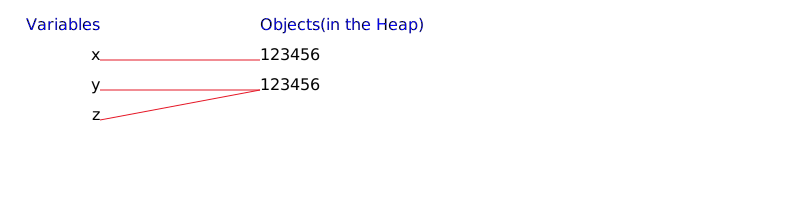

In [164]:
x = 123456
y = 123456
z = y

# graph memory

memgraph(['x', 'y','z'])


In [165]:
# are x & y references to the same object?

x is y

False

In [166]:
# are y & z references to the same object?

y is z

True

In [167]:
# y is z => y == z

y == z

True

In [168]:
# are x & y 'equivalent' in some sense?
# yes - x & y are different objects, but they represent the same integer

x == y

True

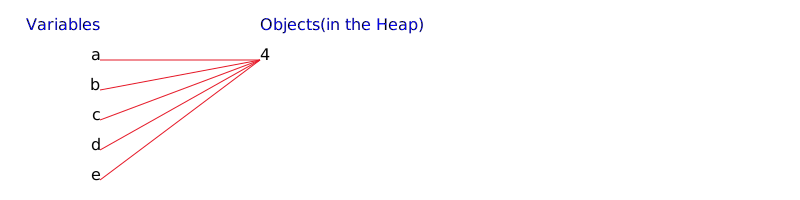

In [169]:
# if we try a small int, like 4, instead of 123456, 
# we get a different result!

# small ints are singletons(interned) for efficiency reasons.
# so, no matter how you compute a '4', you'll get the same '4'
# object

a = 4
b = 4
c = 6 - 2
d = 2*2
e = 2**2
memgraph(['a','b','c','d','e'])

# Automatic memory Management
- when an object has no references to it, it becomes eligible for 'garbage collection'. the storage it uses is recycled
    - Python uses reference counting
- the user does not have to manage allocating and freeing memory, like Java, unlike C++

# None
- Like 'null' in other languages
- Means failure or absence of a value
- is a singleton(there is only one object of class None)
- does not print at top level

In [170]:
# no output

None

In [171]:
# explicit print will show it

print(None)

None


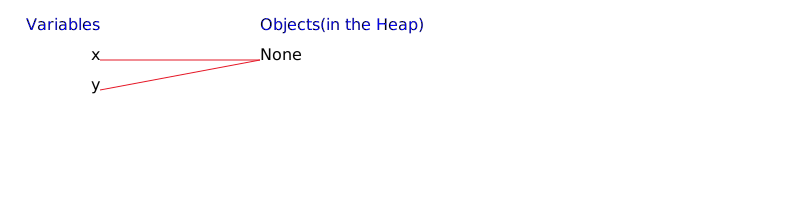

In [172]:
x = None
y = None

memgraph(['x', 'y'])

# Boolean
+ Objects: False, True(both singletons)
+ Operators: 'not', 'and', 'or'
- <.<=, etc
- unlike many languages, &, &&, |, ||, ~, are not boolean operators

In [173]:
not(True and (True or False))

False

In [174]:
1234<=1234

True

In [175]:
123<345

True

# Immutable vs Mutable Objects
- Immutable objects, once created, can never be modified
- Mutable objects can be modified at any time

# Functions
- functions are "first class" objects in Python - they can be assigned as variables, passed as args
- functions are (mostly) immutable objects
- by default, functions return 'None' - you must use the 'return' statement to return a value
- note the ':' at the end of the first line, and the indenting of the function body. this is how you define a 'statement block' in python
- Java/C++ uses '{...}' for statement blocks
- much more about functions later

In [176]:
# returns 'None'

def add2(x):
    x + 2

print(add2(4))

None


In [177]:
# must use return

def add2(x):
    return x + 2

add2(3)

5

In [178]:
# can return multiple values by returning a list(or other data structures)

def addsub2(x):
    return [x+2, x-2]

addsub2(10)

[12, 8]

# Collection Types 
+ hold multiple objects in various configurations
+ several kinds are built into the language
+ can write "collection literals"
- very easy to use

# list
- the heart of Python
- much of the "art" of Python involves getting good at manipulating lists
- a list holds a ordered sequence of objects
- duplicates are allowed
- list objects do not have to be the same type
- lists are zero origin - index of first element is 0
- lists are mutable
- some methods, like 'index' and 'count', have no 'side effects' - they don't modify the list
- others, like reverse, modify the list
- methods that modify the list typically return 'None'
- type name is 'list'

In [179]:
# can make a list by just typing it in

[1,2,3]

[1, 2, 3]

In [180]:
type([2,3,4])

list

# range 
- the 'range' form is often used to specify a list of numbers 
- often used for iteration purposes
- range evaluates to itself
- range is our first example of "lazy evaluation"
    - major theme in Python 3.X

In [181]:
range(0, 10)

range(0, 10)

In [182]:
# to see the corresponding list, use the list function
# note range arguments are inclusive/exclusive - there's no 10 in the list

list(range(0, 10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [183]:
# same as above, assume 0 start

list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [184]:
# 3rd arg is increment

list(range(0, 10, 2))

[0, 2, 4, 6, 8]

In [185]:
# can go backwards too - note no 0 in list

list(range(12, 0, -3))

[12, 9, 6, 3]

In [186]:
# 'len' forces evaluation, 
# and returns the "length" of a collection object

len(range(12,0, -3))

4

In [187]:
# order matters for lists

[1,2,3] == [2,1,3]

False

In [188]:
[2,1,3] == [2,1,3]

True

In [189]:
# duplicates are ok in a list

[1,1,2,3]

[1, 1, 2, 3]

In [190]:
# in languages like Java/C++ would have to select a 
# 'collection' type, instantiate it, and somehow
# 'stuff' the values in. 

# in python, can just directly "write" a list
# the assigment statement does not print the right hand side value

x = [0, 111.111, "zap", True, None]
y = x
x

[0, 111.111, 'zap', True, None]

In [191]:
# variable by itself prints its value

x

[0, 111.111, 'zap', True, None]

In [192]:
# len returns the length of a list

len(x)

5

In [193]:
# 'count' method returns a value, does not modify the list
# count the number of 'True's
# here the 'dot syntax' is used to invoke the list 'count method' 

x.count(2343)

0

In [194]:
# reverse returns None - a hint that it modifies the list
# the 'reverse method' on the list class is invoked

x.reverse()

In [195]:
x

[None, True, 'zap', 111.111, 0]

In [196]:
# what happened to y?
# we didn't explicitly do anything to y, but
# since y references the same object as x,
# it 'sees' the reverse that x.reverse() did

y

[None, True, 'zap', 111.111, 0]

In [197]:
# common mistake 
# reverse does NOT return the reversed list
# if you do this, you just lost your list

z = [1,2,3,4,5,6]
z = z.reverse()
print(z)

None


In [198]:
# Another mistake 
# leaving off the '()' just 
# returns the function object
# the function does NOT run

z = [1,2,3,4,5,6]
z.reverse

<function list.reverse>

In [199]:
# so no change to z

z

[1, 2, 3, 4, 5, 6]

In [200]:
x

[None, True, 'zap', 111.111, 0]

In [201]:
# Python has very convenient techniques for accessing 
# and modifying list elements 
# can index into the list like an array, 
# and retrieve one element

x[2]

'zap'

In [202]:
# negative index starts from the last list element

x[-1]

0

In [203]:
# can take a subsequences (slice) of the list
# like range, inclusive/exclusive
# slices always COPY the original list

x[0:2]

[None, True]

In [204]:
# missing second index means continue slice to the end of the list

x[3:]

[111.111, 0]

In [205]:
# missing first index means start slice at begining  of the list

x[:2]

[None, True]

In [206]:
# can add a index increment to a slice

x[0:8:2]

[None, 'zap', 0]

In [207]:
# index missing on both sides of ":" - slice 
# is the whole list. 
# common python shorthand for copying
# an entire list

x2 = x[:]

# reverse modifies x2, but x will not be changed, because
# x and x2 are referencing different objects
# reverse() returns 'None'

print(x2)
print(x2.reverse())
print(x2)
print(x)

[None, True, 'zap', 111.111, 0]
None
[0, 111.111, 'zap', True, None]
[None, True, 'zap', 111.111, 0]


In [208]:
# can set list elements

x[0] = -1
x

[-1, True, 'zap', 111.111, 0]

In [209]:
# can set slices

x[3:5] = [2**8, False]
x

[-1, True, 'zap', 256, False]

In [210]:
#  'in' operator - is an element in the list somewhere?
# uses == to test

['zap' in x, 55 in x]

[True, False]

In [211]:
# where is the element?
# 'index' is a 'method' on the list class

x.index('zap')

2

In [212]:
# index throws an error if it doesn't find anything
# we will learn more about errors later

x.index("not in there")

ValueError: 'not in there' is not in list

In [213]:
# + concatenates lists
# note: what '+' actually does depends on the type of its arguments

x = list(range(5))
x + x

[0, 1, 2, 3, 4, 0, 1, 2, 3, 4]

In [214]:
x

[0, 1, 2, 3, 4]

In [215]:
# add one element at the end

x.append([22,33])
x

[0, 1, 2, 3, 4, [22, 33]]

In [216]:
# add N elements at the end

x.extend([22,33])
x

[0, 1, 2, 3, 4, [22, 33], 22, 33]

In [217]:
# add one element anywhere

x.insert(2, 5)
x

[0, 1, 5, 2, 3, 4, [22, 33], 22, 33]

In [218]:
# pop method removes and returns a 
# list element, by default the last element

print(x.pop())
print(x)

33
[0, 1, 5, 2, 3, 4, [22, 33], 22]


In [219]:
# but can specify which element to pop

print(x.pop(2))
print(x)

5
[0, 1, 2, 3, 4, [22, 33], 22]


In [220]:
# remove first 4 found

x.remove(4)
print(x)

[0, 1, 2, 3, [22, 33], 22]


In [221]:
# sort modifies the list

x = [34,3,5,22]
x.sort()
x

[3, 5, 22, 34]

In [222]:
# can preserve original list by using 'sorted'
# sorted makes a copy of the input list

x = [34,3,5,22]
y = sorted(x)
[x, y]

[[34, 3, 5, 22], [3, 5, 22, 34]]

In [223]:
# dir shows the methods defined on a class
# __XYZ__ are "special" methods - ignore them for now

dir(list)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

# Iterating over Lists
- Many ways to iterate, we'll look at the
two most important here, 'for' and 'list comprehensions'
- Python does NOT have C++/Java style loops, like:


for(int j = 0; j<5; j++)
{
}

# for loop
- Python version of C++/Java loop above
- Python loops are simpler
- note trailing ':', and indented print statements - defines a statement block
- Python uses idents and ':' to define blocks, unlike C/Java, which uses '{}'

In [224]:
for j in range(10,15):
    print(j)
    print(j+10)
print('loop finished')

10
20
11
21
12
22
13
23
14
24
loop finished


In [225]:
# to sum up a list of numbers
# use zn 'acculumation variable'

sum = 0

for j in range(5):
    sum += j

sum

10

In [226]:
# add 10 to every element of a list
# use list acculumation variable

a10 = []

for j in range(5):
    a10.append(10+j)

a10

[10, 11, 12, 13, 14]

# list comprehension
- above technique is not conidered 'pythonic'
- syntax is a little odd at first glance
- no accum var needed
- can optionally do filtering

In [227]:
# add 10 again

[j+10 for j in range(5)]

[10, 11, 12, 13, 14]

In [228]:
# filter - add 10 only to even ints
# '%' is mod operator

[j+10 for j in range(5) if j % 2 == 0]

[10, 12, 14]

# Tuples
- like lists, but immutable - can't be modified after creation
    - however, objects that the tuple refers to can still be modified
- useful for functional programming
- 'tuple' is the type name

In [232]:
# len returns length of top level elements

t = (1,[5,6],4)
[t , len(t), type(t)]

[(1, [5, 6], 4), 3, tuple]

In [233]:
len(t)

3

In [234]:
# can retrieve

t[0]

1

In [235]:
# but can't modify

t[0] = 3

TypeError: 'tuple' object does not support item assignment

In [236]:
t

(1, [5, 6], 4)

In [237]:
# but - objects the tuple refers to are NOT made immutable

t[1][0] = 45
t

(1, [45, 6], 4)

In [238]:
# tuples loop like lists

for x in (1,2,3):
    print(x)

1
2
3


# Iterables
- 'iterables' are objects you can iterate over
- lists and tuples are iterables

# Strings
+ immutable - once created, cannot be modified
- in Python version 3.X, strings are unicode
- many useful methods
- the 're' module provides regular expression pattern matching
- three types of string literals 'foo', "foo", and '''foo'''
- triple quotes can include multiple lines
- unlike other languages, there is no 'character' type
- a Python 'character' is just a length 1 string
- 'str' is the type name

In [239]:
# len returns number of characters

['foobar', 'foo"bar', type('foobar'), len('foobar')]

['foobar', 'foo"bar', str, 6]

In [240]:
# various ways to embed quotes

['foo"bar', "foo'bar", 'foo\'bar']

['foo"bar', "foo'bar", "foo'bar"]

In [241]:
# use triple quotes to define multi-line strings

'''
foo'
bar"
'''

'\nfoo\'\nbar"\n'

In [242]:
# Strings are iterables

for s in 'FooBar':
    print(s)

F
o
o
B
a
r


In [243]:
# string methods that return a string always return a NEW string. 
# the original string is NEVER modified

s = 'FooBar'
ls = [s, s.lower(), s.upper(), s.replace('o','X'), s.swapcase()]


In [244]:
# first element of list is the original 'FooBar' - has not
# been modified by any of the methods run above
# rest of list contains 4 NEW string objects, derived from the
# original 'FooBar'

ls

['FooBar', 'foobar', 'FOOBAR', 'FXXBar', 'fOObAR']

In [245]:
# join is a very handy method

[','.join(ls), '|'.join(ls), '---'.join(ls)]

['FooBar,foobar,FOOBAR,FXXBar,fOObAR',
 'FooBar|foobar|FOOBAR|FXXBar|fOObAR',
 'FooBar---foobar---FOOBAR---FXXBar---fOObAR']

In [246]:
# the inverse, split, creates a list of tokens

s = "foo,bar,34,zap"
s.split(",")

['foo', 'bar', '34', 'zap']

In [247]:
# strip can remove chars at the begining(left) and/or end(right) of a string
# Note middle 'X' is not removed
# Most commonly used to remove new lines from a string

s = 'XXfooXbarXXX'
[s.strip('X'), s.lstrip('X'), s.rstrip('X')]

['fooXbar', 'fooXbarXXX', 'XXfooXbar']

In [248]:
# '+' concatenates strings as well as lists
# the operation '+' performs depends on the type of the arguments

s + s

'XXfooXbarXXXXXfooXbarXXX'

In [249]:
# can repeat strings

[2*"abc", "xyz"*4]

['abcabc', 'xyzxyzxyzxyz']

In [250]:
# 'in' looks for substrings
# case sensitive compares

s = 'zappa'
['pa' in s, 'Za' in s, s.count('p'), s.count('ap')]

[True, False, 2, 1]

In [251]:
# search for a substring with 'find' or 'index'

[s.find('pa'), s.index('pa')]

[3, 3]

In [252]:
# on a miss, 'find' returns -1

s.find('32')

-1

In [253]:
# but index throws an error

s.index('32')

ValueError: substring not found

In [254]:
# 'ord' and 'chr' do character-number conversions

[ord('A'), chr(65)]

[65, 'A']

In [255]:
# make the lower case chars, a-z
# somewhat terse one liner - 
# in Python you can do alot with a little code, 
# but can be hard to read

lc= ''.join([chr(c) for c in range(ord('a'), ord('z')+1)])
lc

'abcdefghijklmnopqrstuvwxyz'

In [256]:
# let's break it into separate steps:
# get the ascii codes for 'a' and 'z'

a = ord('a')
z = ord('z')
[a,z]

[97, 122]

In [257]:
# now we have all the codes for 'a' to 'z'
# note the z+1 - need the +1 to get the z code

codes = [c for c in range(a,z+1)]
print(codes)

[97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122]


In [258]:
# now we have a list of the lower case characters

chars = [chr(c) for c in codes]
print(chars)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [259]:
# last step - using the 'join' method on string, 
# merge the chars into one string

''.join(chars)

'abcdefghijklmnopqrstuvwxyz'

In [260]:
# now that we have suffered, there is an easier way
# string package has useful constants

import string
string.ascii_lowercase

'abcdefghijklmnopqrstuvwxyz'

In [261]:
# can slice strings too

[len(lc), lc[10:20], lc[10:20:2], lc[10:11]]

[26, 'klmnopqrst', 'kmoqs', 'k']

In [262]:
# unlike a list, a string is immutable - you can't change anything

s = 'foobar'
s[0] = 't'

TypeError: 'str' object does not support item assignment

In [263]:
# unlike list objects, string objects don't have a reverse method
# but you can reverse with a slice
# works with lists as well

s = '1234'
z = [1,2,3,4]
[s[::-1], z[::-1]]

['4321', [4, 3, 2, 1]]

In [264]:
# startswith, endwith string methods are sometimes 
# convenient alternatives to regular expressions

a = "foo.txt"

[a.startswith('foo'), a.endswith('txt'), a.endswith('txt2')]

[True, True, False]

In [265]:
# 'str' converts objects to strings

[str(234), str(3.34), str([1,2,3])]

['234', '3.34', '[1, 2, 3]']

In [266]:
# 'list' converts a string into a list of 
# characters(length one strings)

list('foobar')

['f', 'o', 'o', 'b', 'a', 'r']

# 'printf' style string formatting - old way
    - still works, but deprecated

In [267]:
'int %d float %f string %s' % (3, 5.5, 'printf')

'int 3 float 5.500000 string printf'

# 'printf' style string formatting - new way
- preferred method
- looks at the type of the arg, so don't have to specify type in control string
- [details](https://docs.python.org/3.5/library/string.html#custom-string-formatting)

In [268]:
'int {} float {} string {}'.format(3, 5.5, 'printf')

'int 3 float 5.5 string printf'

In [269]:
# lots of methods on strings

dir(str)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',
 'title',
 'translate',
 'upper',
 'zfill']